In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\Academics\Data Science\Logistic regression\titanic.csv')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

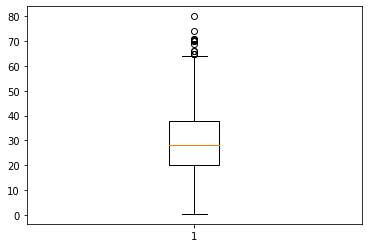

In [7]:
plt.boxplot(df['Age'])
plt.show()

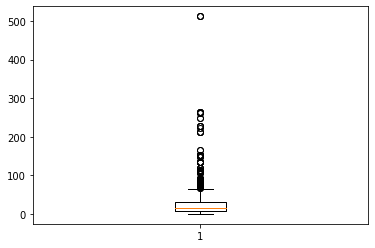

In [8]:
plt.boxplot(df['Fare'])
plt.show()

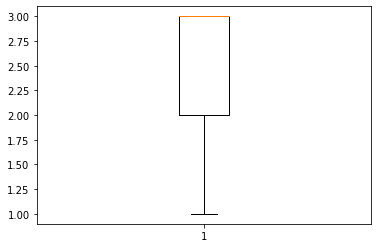

In [9]:
plt.boxplot(df['Pclass'])
plt.show()

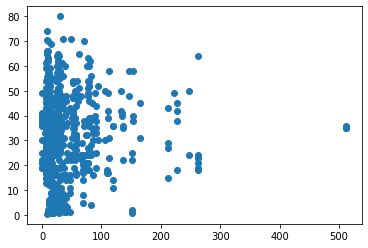

In [10]:
plt.scatter(df['Fare'],df['Age'])
plt.show()

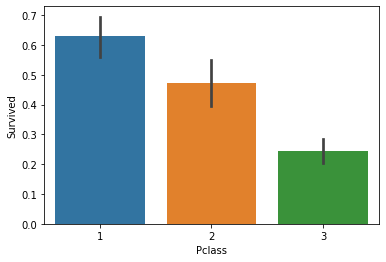

In [11]:
# We can see class 1 ticket people have higher surviaval chances
sns.barplot(df['Pclass'],df['Survived'])
plt.show()

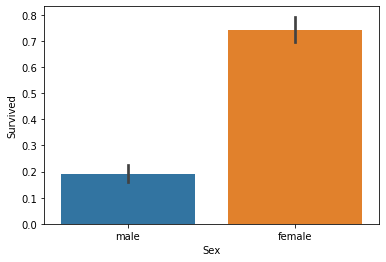

In [12]:
# Females have very higher survival rate than men 
sns.barplot(df['Sex'],df['Survived'])
plt.show()

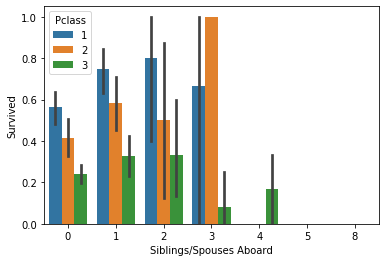

In [13]:
# There is a slight increase in survival chances if there are siblings than if there are none
sns.barplot(df['Siblings/Spouses Aboard'],df['Survived'], hue= df['Pclass'])
plt.show()

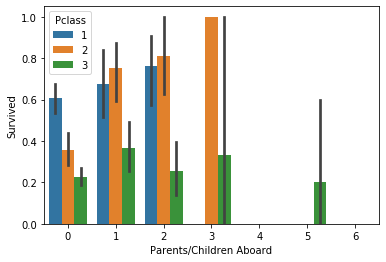

In [14]:
# There is a slight increase in survival chances if there are Parents/Children than if there are none
sns.barplot(df['Parents/Children Aboard'], df['Survived'], hue= df['Pclass'])
plt.show()


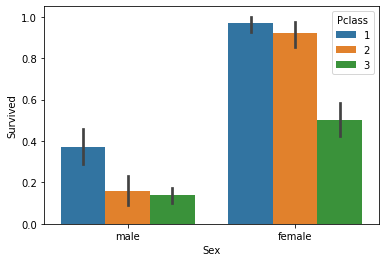

In [15]:
#Difference in survival of class 2 and 3 of men is less and class 1 and 2 is less
#Difference in survial of class 1 and 2 of men is very high and survial of class 2 and 3 of women is very high
sns.barplot(df['Sex'], df['Survived'], hue= df['Pclass'])
plt.show()


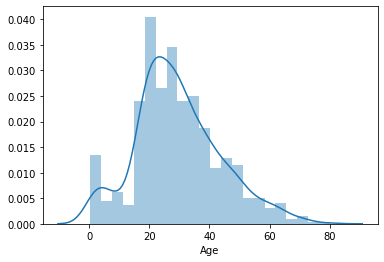

In [16]:
# Age is uniformly distributed
sns.distplot(df['Age'])
plt.show()

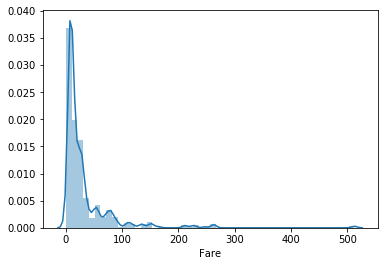

In [17]:
# Long tailed distribution of Fare
sns.distplot(df['Fare'])

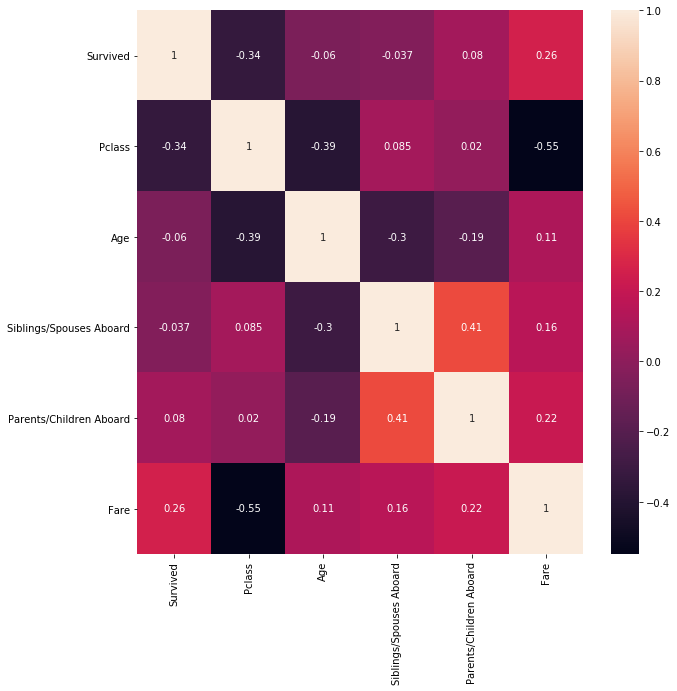

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

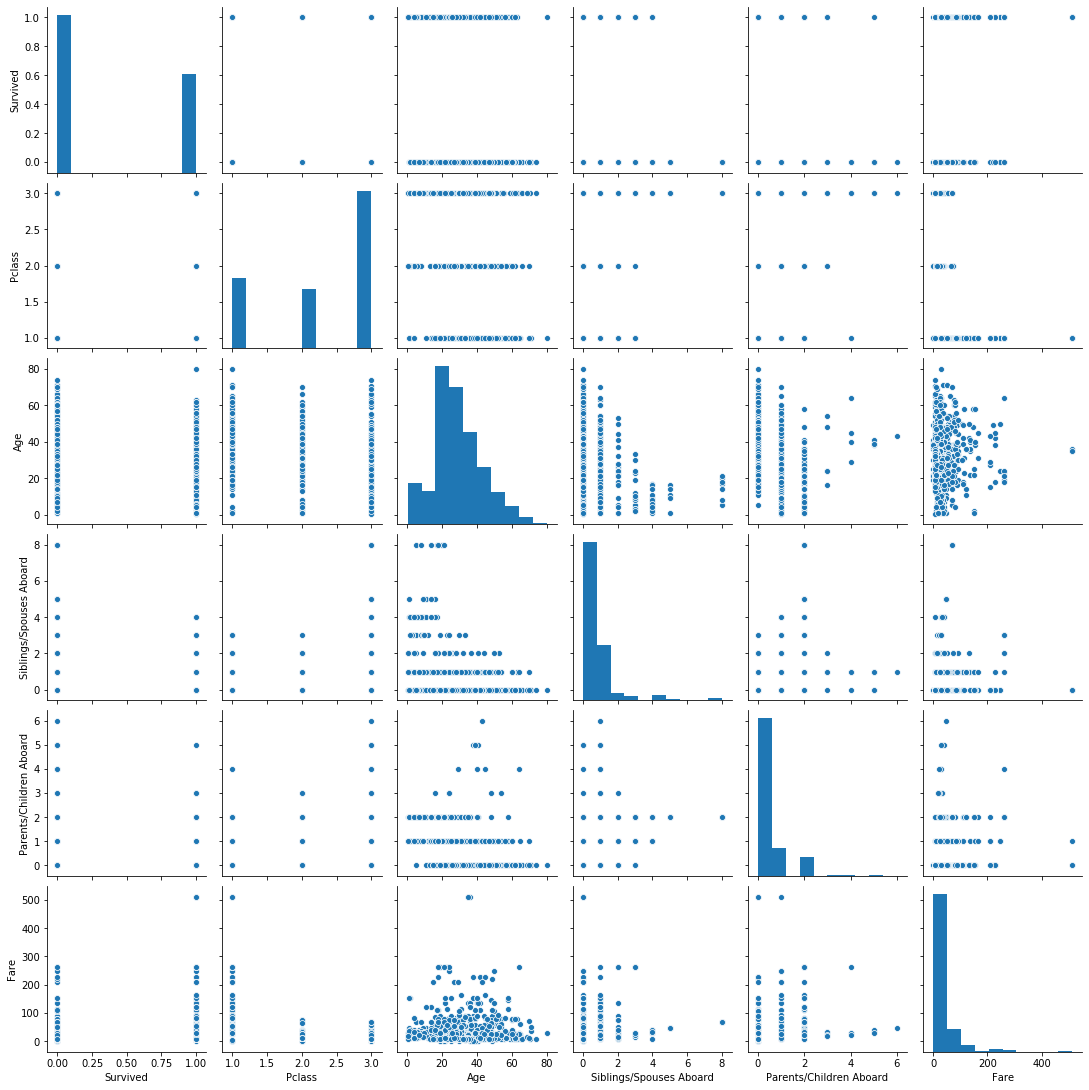

In [19]:
sns.pairplot(df)
plt.show()


In [20]:
# Name column of no use in the analysis
df = df.drop('Name', axis=1)

In [21]:
# Outliers in Fare can be seen as there are very few with fare higher than 450, those values are removed to improve the model
df = df.loc[df.Fare < 450]

In [22]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,884.000000,884.000000,884.00000,884.000000,884.000000,884.000000
mean,0.383484,2.309955,29.45155,0.527149,0.383484,30.676380
std,0.486510,0.834608,14.14171,1.106118,0.808364,41.245013
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.00000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.00000,8.000000,6.000000,263.000000


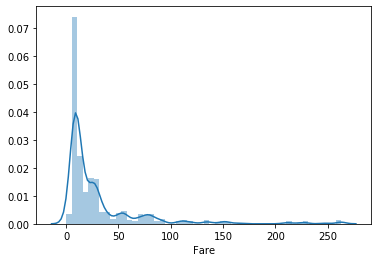

In [23]:
sns.distplot(df['Fare'])

In [24]:
# Creating dummy variables for Gender column
df = pd.get_dummies(df, columns = ['Sex'], drop_first =True)

In [25]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [26]:
# Fairly uniform distribution
num_df = df[['Fare','Age']]
num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99,.997,.999])

,Fare,Age
count,884.000000,884.00000
mean,30.676380,29.45155
std,41.245013,14.14171
min,0.000000,0.42000
25%,7.925000,20.00000
50%,14.454200,28.00000
75%,31.000000,38.00000
90%,77.120010,49.00000
95%,110.883300,55.92500
99%,227.525000,66.00000


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df1 = df.copy()
X=df1.drop('Survived', axis=1)
y=df['Survived']

In [29]:
X.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, random_state=100)

In [31]:
X_train.shape

(707, 6)

In [32]:
X_test.shape

(177, 6)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
Scalar = MinMaxScaler()

In [35]:
X_train[['Age','Fare']] = Scalar.fit_transform(X_train[['Age','Fare']])

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
X_train.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
152,3,0.503644,0,2,0.055133,1
330,1,0.472229,0,1,0.583508,1
335,1,0.509927,0,0,0.511407,0
819,3,0.334004,0,1,0.047433,0
198,2,0.296306,0,0,0.049430,0


In [37]:
import statsmodels.api as sm

In [38]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  707
Model:                            GLM   Df Residuals:                      700
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -305.49
Date:                Sun, 16 Aug 2020   Deviance:                       610.97
Time:                        17:14:07   Pearson chi2:                     750.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.5276      0.651      8.491      0.000       4.252       6.804
Pclass                     -1.2561      0.174     -7.206      0.000      -1.598      -0.914
Age                        -3.6159      0.704     -5.135      0.000      -4.996      -2.236
Siblings/Spouses Aboard    -0.3723      0.124     -3.003      0.003      -0.615      -0.129
Parents/Children Aboard    -0.0264      0.137     -0.192      0.848      -0.296       0.243
Fare                        0.2465      0.900      0.274      0.784      -1.517       2.010
Sex_male                   -2.8100      0.226    -12.426      0.000      -3.253      -2.367
===========================================================================================
"""

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

152    0.051624
330    0.467927
335    0.927826
819    0.631127
198    0.876129
769    0.087675
857    0.251419
712    0.131520
868    0.496483
573    0.817857
dtype: float64

In [41]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0516239 , 0.46792693, 0.92782597, 0.63112731, 0.87612887,
       0.08767544, 0.25141879, 0.13152041, 0.49648336, 0.81785735])

In [42]:
y_train.head()

152    0
330    0
335    1
819    1
198    0
Name: Survived, dtype: int64

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,4.28
1,Age,4.17
5,Sex_male,3.10
4,Fare,1.93
2,Siblings/Spouses Aboard,1.67
3,Parents/Children Aboard,1.62


In [44]:
#Pclass has very high VIF so it is dropped
X_train=X_train.drop('Pclass',1)

In [45]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  707
Model:                            GLM   Df Residuals:                      701
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -333.90
Date:                Sun, 16 Aug 2020   Deviance:                       667.80
Time:                        17:14:09   Pearson chi2:                     695.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.5405      0.288      5.349      0.000       0.976       2.105
Age                        -1.6880      0.609     -2.770      0.006      -2.883      -0.493
Siblings/Spouses Aboard    -0.4435      0.118     -3.765      0.000      -0.674      -0.213
Parents/Children Aboard    -0.1678      0.131     -1.283      0.200      -0.424       0.089
Fare                        4.3916      0.852      5.157      0.000       2.723       6.061
Sex_male                   -2.6439      0.209    -12.636      0.000      -3.054      -2.234
===========================================================================================
"""

In [46]:
# Parents/Children Aboard has high p value so it is removed
X_train = X_train.drop('Parents/Children Aboard',1)

In [47]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  707
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -334.72
Date:                Sun, 16 Aug 2020   Deviance:                       669.45
Time:                        17:14:09   Pearson chi2:                     697.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.4553      0.279      5.212      0.000       0.908       2.003
Age                        -1.6157      0.605     -2.672      0.008      -2.801      -0.431
Siblings/Spouses Aboard    -0.4795      0.115     -4.174      0.000      -0.705      -0.254
Fare                        4.1569      0.823      5.053      0.000       2.545       5.769
Sex_male                   -2.5870      0.203    -12.757      0.000      -2.984      -2.190
===========================================================================================
"""

In [48]:
y_train_pred1 = res.predict(X_train_sm).values.reshape(-1)

In [49]:
y_train_pred1[:10]

array([0.15236709, 0.62971568, 0.94032617, 0.75266545, 0.76532232,
       0.16830837, 0.13620933, 0.19973959, 0.1526403 , 0.72692172])

In [50]:
y_train_pred_final = pd.DataFrame({'CC':y_train.values, 'CC_Prob':y_train_pred1})
y_train_pred_final.head()

,CC,CC_Prob
0,0,0.152367
1,0,0.629716
2,1,0.940326
3,1,0.752665
4,0,0.765322


In [51]:
y_train_pred_final['Predicted'] = y_train_pred_final.CC_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,CC,CC_Prob,Predicted
0,0,0.152367,0
1,0,0.629716,1
2,1,0.940326,1
3,1,0.752665,1
4,0,0.765322,1


In [52]:
from sklearn import metrics

In [53]:
confusion = metrics.confusion_matrix(y_train_pred_final.CC, y_train_pred_final.Predicted)
print(confusion)

[[377  61]
 [ 85 184]]


In [54]:
print(metrics.accuracy_score(y_train_pred_final.CC, y_train_pred_final.Predicted))

0.7934936350777935


In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,3.05
3,Sex_male,2.45
2,Fare,1.72
1,Siblings/Spouses Aboard,1.25


In [56]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [57]:
TP/float(TN+FP)

0.4200913242009132

In [58]:
TN/float(TN+FP)

0.860730593607306

In [59]:
print(FP/ float(TN+FP))

0.13926940639269406


In [60]:
print(TN/float(TN+FN))

0.816017316017316


In [61]:
def draw_roc(actual, Prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, Prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, Prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)'% auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.CC, y_train_pred_final.CC_Prob, drop_intermediate = False)

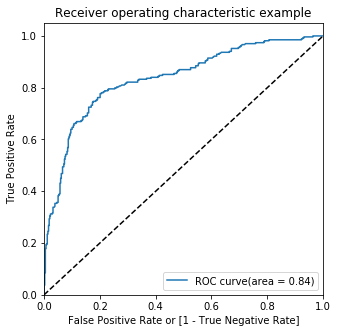

In [63]:
draw_roc(y_train_pred_final.CC, y_train_pred_final.CC_Prob)

In [64]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.CC_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,CC,CC_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.152367,0,1,1,0,0,0,0,0,0,0,0
1,0,0.629716,1,1,1,1,1,1,1,1,0,0,0
2,1,0.940326,1,1,1,1,1,1,1,1,1,1,1
3,1,0.752665,1,1,1,1,1,1,1,1,1,0,0
4,0,0.765322,1,1,1,1,1,1,1,1,1,0,0


In [65]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.CC, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380481  1.000000  0.000000
0.1   0.1  0.424328  0.985130  0.079909
0.2   0.2  0.749646  0.814126  0.710046
0.3   0.3  0.792079  0.724907  0.833333
0.4   0.4  0.787836  0.695167  0.844749
0.5   0.5  0.793494  0.684015  0.860731
0.6   0.6  0.796322  0.669145  0.874429
0.7   0.7  0.782178  0.568773  0.913242
0.8   0.8  0.700141  0.234201  0.986301
0.9   0.9  0.656294  0.104089  0.995434


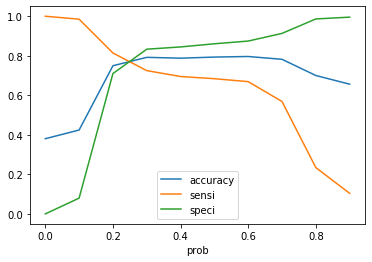

In [66]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

In [67]:
y_train_pred_final['final_predicted'] = y_train_pred_final.CC_Prob.map(lambda x: 1 if x > 0.29 else 0)
y_train_pred_final.head()

,CC,CC_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.152367,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.629716,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.940326,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.752665,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.765322,1,1,1,1,1,1,1,1,1,0,0,1


In [68]:
metrics.accuracy_score(y_train_pred_final.CC, y_train_pred_final.final_predicted)

0.7934936350777935

In [69]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.CC, y_train_pred_final.final_predicted)
confusion2

array([[364,  74],
       [ 72, 197]], dtype=int64)

In [70]:
X_test.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
810,3,30.5,0,0,8.0500,1
566,3,32.0,0,0,7.8542,1
188,3,36.0,0,0,7.8958,1
171,3,1.0,1,1,11.1333,0
749,3,23.0,0,0,7.8958,1


In [71]:
# Scalling of test data
X_test[['Age','Fare']] = Scalar.fit_transform(X_test[['Age','Fare']])

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [72]:
# As these columns are not used in training the model these are dropped
X_test = X_test.drop('Pclass',1)
X_test = X_test.drop('Parents/Children Aboard',1)
X_test.head()

,Age,Siblings/Spouses Aboard,Fare,Sex_male
810,0.461610,0,0.030681,1
566,0.485019,0,0.029935,1
188,0.547441,0,0.030094,1
171,0.001248,1,0.042433,0
749,0.344569,0,0.030094,1


In [73]:
X_test_sm = sm.add_constant(X_test)

In [74]:
y_test_pred = res.predict(X_test_sm)

In [75]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [76]:
y_pred_1.head()

,0
810,0.148062
566,0.142974
188,0.131130
171,0.759557
749,0.173184


In [77]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [78]:
y_test_df = pd.DataFrame(y_test)

In [79]:
y_test_df.head()

,Survived
810,0
566,1
188,0
171,1
749,0


In [80]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [81]:
y_test_pred_final.shape

(177, 2)

In [82]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'CC_Prob'})

In [83]:
y_test_pred_final['final_predicted'] = y_test_pred_final.CC_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [84]:
y_test_pred_final.head()

,Survived,CC_Prob,final_predicted
810,0,0.148062,0
566,1,0.142974,0
188,0,0.131130,0
171,1,0.759557,1
749,0,0.173184,0


In [85]:
y_test_pred_final['Survived'].tail(50)

563    0
693    0
773    1
633    0
98     0
73     1
307    1
303    1
886    0
279    0
778    0
28     1
610    0
609    1
825    1
164    1
635    0
730    0
738    1
787    0
728    0
675    0
100    0
156    0
597    1
10     1
197    1
631    0
424    1
689    1
584    1
705    1
568    1
593    1
229    1
530    1
558    0
382    0
824    1
699    0
173    0
720    1
639    0
673    0
504    1
744    0
260    0
405    1
216    0
704    1
Name: Survived, dtype: int64

In [86]:
# Accuracy checked on test data
metrics.accuracy_score(y_test_pred_final.Survived, y_test_pred_final.final_predicted)

0.7457627118644068

In [87]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Survived, y_test_pred_final.final_predicted)
confusion2

array([[84, 23],
       [22, 48]], dtype=int64)

In [88]:
y_test_pred_final.final_predicted.count()

177